# Step 0. Read in Data, Check for NA values

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib.lines as lines
warnings.filterwarnings("ignore")

In [56]:
print(pd.__version__)

1.5.2


In [2]:
import seaborn as sns
sns.__version__


'0.12.2'

In [3]:
from platform import python_version

print(python_version())

3.8.15


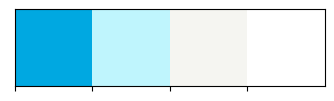

In [4]:
sns.palplot(['#00A8E1', '#BFF5FD','#f5f5f1', '#FFFFFF'])
plt.show()

In [34]:
df = pd.read_csv("amazon_prime_titles.csv")

In [6]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2082
cast            1233
country         8996
date_added      9513
release_year       0
rating           337
duration           0
listed_in          0
description        0
dtype: int64

# #1 Visualisation

In [7]:
movie_type = df.groupby('type')['type'].count()
y = len(df)
percent = ((movie_type/y)).round(2)

mf_ratio = percent.to_frame().T

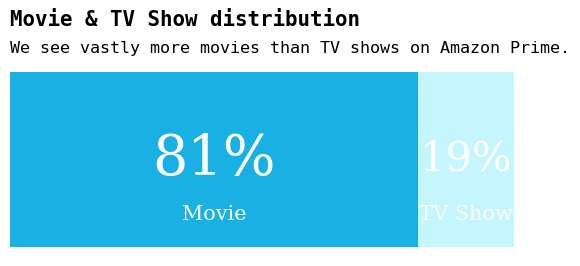

In [8]:
fig, ax = plt.subplots(1,1,figsize=(6.5, 2.5))

ax.barh(mf_ratio.index, mf_ratio['Movie'], 
        color='#00A8E1', alpha=0.9, label='Male')
ax.barh(mf_ratio.index, mf_ratio['TV Show'], left=mf_ratio['Movie'], 
        color='#BFF5FD', alpha=0.9, label='Female')

ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticks([])

for i in mf_ratio.index:
    ax.annotate(f"{int(mf_ratio['Movie'][i]*100)}%", 
                   xy=(mf_ratio['Movie'][i]/2, i),
                   va = 'center', ha='center',fontsize=40, fontweight='light', fontfamily='serif',
                   color='white')

    ax.annotate("Movie", 
                   xy=(mf_ratio['Movie'][i]/2, -0.25),
                   va = 'center', ha='center',fontsize=15, fontweight='light', fontfamily='serif',
                   color='white')
    
for i in mf_ratio.index:
    ax.annotate(f"{int(mf_ratio['TV Show'][i]*100)}%", 
                   xy=(mf_ratio['Movie'][i]+mf_ratio['TV Show'][i]/2, i),
                   va = 'center', ha='center',fontsize=30, fontweight='light', fontfamily='serif',
                   color='white')
    ax.annotate("TV Show", 
                   xy=(mf_ratio['Movie'][i]+mf_ratio['TV Show'][i]/2, -0.25),
                   va = 'center', ha='center',fontsize=15, fontweight='light', fontfamily='serif',
                   color='white')

# Title and Subtitle
fig.text(0.125,1.03,'Movie & TV Show distribution', fontfamily='monospace',fontsize=15, fontweight='bold')
fig.text(0.125,0.92,'We see vastly more movies than TV shows on Amazon Prime.',fontfamily='monospace',fontsize=12)

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

ax.legend().set_visible(False)
plt.show()

In [9]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

# #2nd Visualisation - Top 10 Countries on Prime

In [38]:
df['Count'] = 1
df['First_Country'] = df['country'].astype(str).str.split(",")
df['First_Country'] = df['First_Country'].str[0]
df['First_Country'].value_counts()

# Reduce countries's name length
df['First_Country'].replace('United States', 'USA', inplace=True)
df['First_Country'].replace('United Kingdom', 'UK',inplace=True)
df['First_Country'].replace('South Korea', 'S. Korea',inplace=True)

In [39]:
data = df[~(df['First_Country'] == 'nan')]
data = data.groupby('First_Country')['Count'].sum().sort_values(ascending = False)[:10]

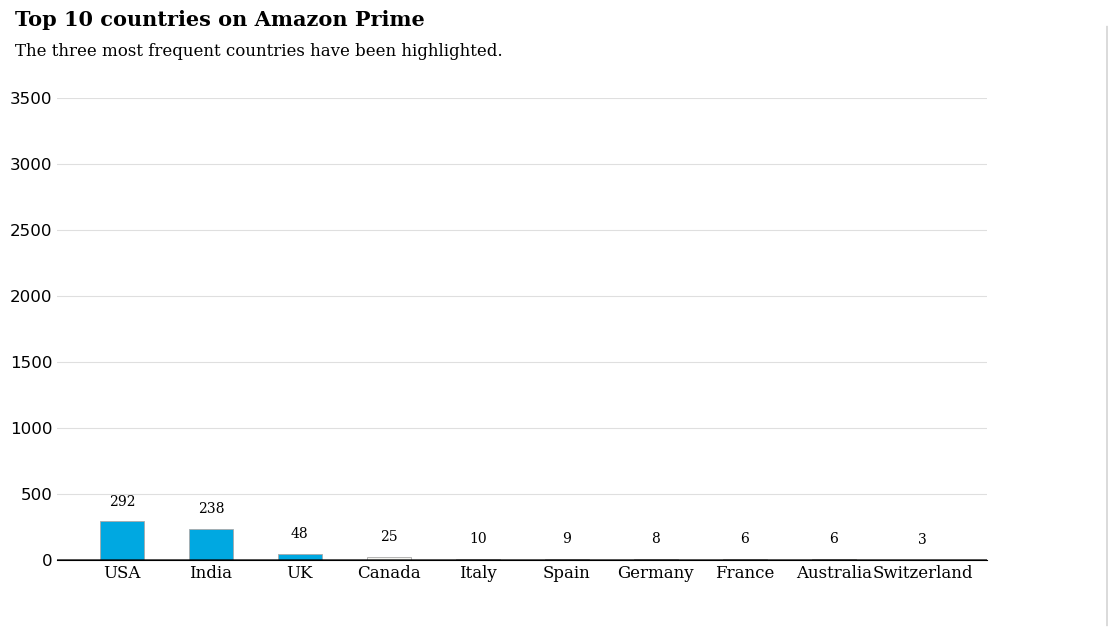

In [12]:
color_map = ['#f5f5f1' for _ in range(10)]
color_map[0] = color_map[1] = color_map[2] =  '#00A8E1' # color highlight

fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.bar(data.index, data, width=0.5, 
       edgecolor='darkgray',
       linewidth=0.6,color=color_map)

#annotations
for i in data.index:
    ax.annotate(f"{data[i]}", 
                   xy=(i, data[i] + 150), #i like to change this to roughly 5% of the highest cat
                   va = 'center', ha='center',fontweight='light', fontfamily='serif')

# Remove border from plot
for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
# Tick labels
ax.set_xticklabels(data.index, fontfamily='serif', rotation=0)

# Title and sub-title
fig.text(0.09, 1, 'Top 10 countries on Amazon Prime', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.09, 0.95, 'The three most frequent countries have been highlighted.', fontsize=12, fontweight='light', fontfamily='serif')

ax.grid(axis='y', linestyle='-', alpha=0.4)   

grid_y_ticks = np.arange(0, 4000, 500) # y ticks, min, max, then step
ax.set_yticks(grid_y_ticks)
ax.set_axisbelow(True)

# thicken the bottom line if you want to
plt.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

ax.tick_params(axis='both', which='major', labelsize=12)

l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])

ax.tick_params(axis=u'both', which=u'both',length=0)

    

plt.show()

# #3 visualisation - Top 10 Countries Movies / Tv Show Stacked Bar Chart

In [44]:
df = df[~(df['First_Country'] == 'nan')]

In [14]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'Count', 'First_Country'],
      dtype='object')

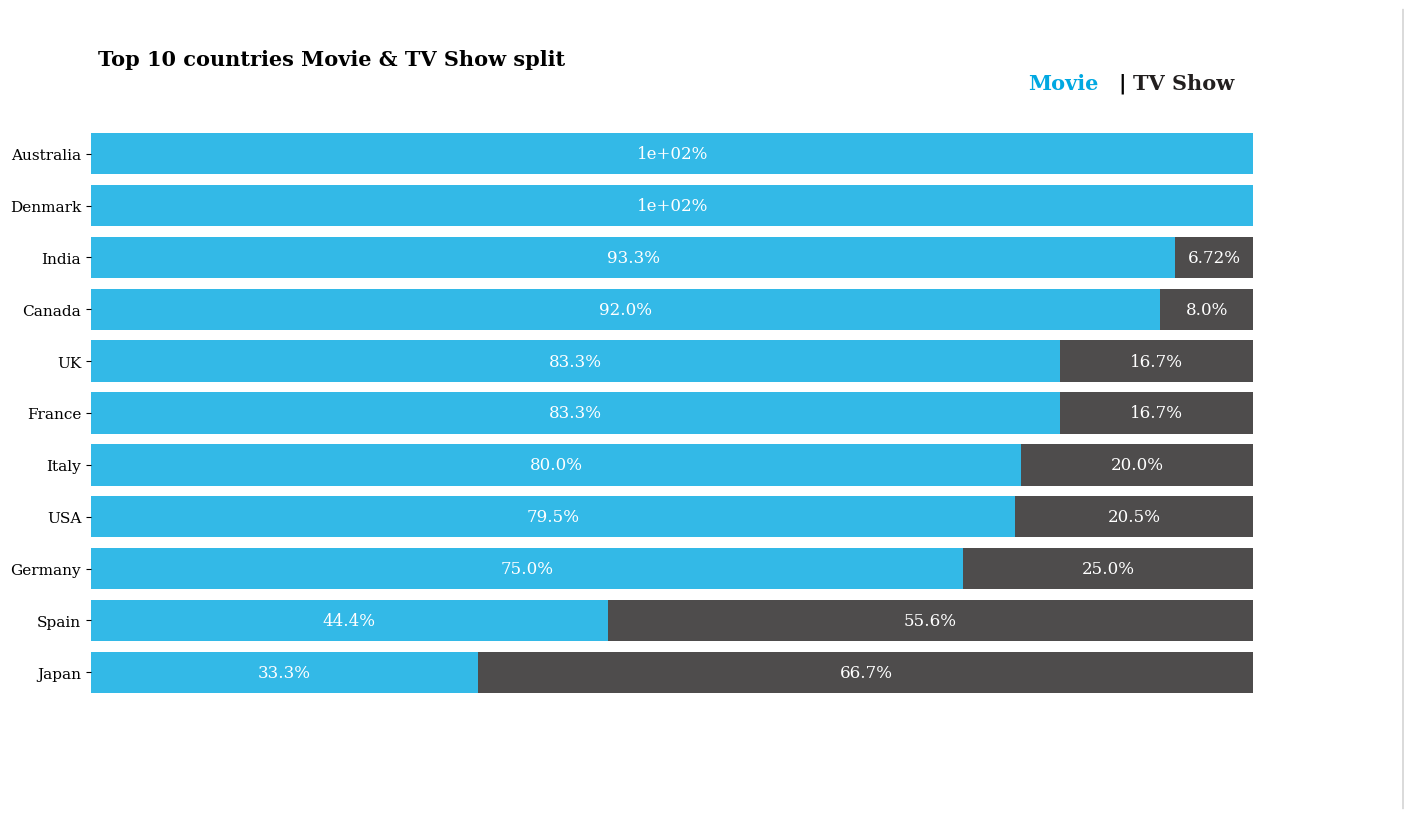

In [15]:
# Data Wrangling - Changing data into required format 
country_order = df['First_Country'].value_counts()[:11].index
data_q2q3 = df[['type', 'First_Country']].groupby('First_Country')['type'] \
            .value_counts().unstack().loc[country_order]
data_q2q3['sum'] = data_q2q3.sum(axis=1)
data_q2q3_ratio = (data_q2q3.T / data_q2q3['sum']).T[['Movie', 'TV Show']]\
                   .sort_values(by='Movie',ascending=False)[::-1]

# Creating Stacked barplot
fig, ax = plt.subplots(1,1,figsize=(15, 8))
ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['Movie'], 
        color='#00A8E1', alpha=0.8, label='Movie')
ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['TV Show'], left=data_q2q3_ratio['Movie'], 
        color='#221f1f', alpha=0.8, label='TV Show')

ax.set_xticks([])
ax.set_yticklabels(data_q2q3_ratio.index, fontfamily='serif', fontsize=11)

# Annotation - Percentage number on the barchart
for i in data_q2q3_ratio.index:
    ax.annotate(f"{data_q2q3_ratio['Movie'][i]*100:.3}%", 
                   xy=(data_q2q3_ratio['Movie'][i]/2, i),
                   va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',
                   color='white')

for i in data_q2q3_ratio.index:
    ax.annotate(f"{data_q2q3_ratio['TV Show'][i]*100:.3}%", 
                   xy=(data_q2q3_ratio['Movie'][i]+data_q2q3_ratio['TV Show'][i]/2, i),
                   va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',
                   color='white')

fig.text(0.13, 0.93, 'Top 10 countries Movie & TV Show split', fontsize=15, fontweight='bold', fontfamily='serif')
for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
    
# Legend on the top right hand corner
fig.text(0.75,0.9,"Movie", fontweight="bold", fontfamily='serif', fontsize=15, color='#00A8E1')
fig.text(0.81,0.9,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.82,0.9,"TV Show", fontweight="bold", fontfamily='serif', fontsize=15, color='#221f1f')

import matplotlib.lines as lines
l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])

plt.show()

# #4th Visualisation Ratings Ages Heat Map
- Based on the various ratings available, Show the proportion of target audience for each country 

In [16]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Count,First_Country
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...,1,Canada
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...,1,India
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...,1,USA
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ...",1,USA
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...,1,UK


In [45]:
# Taken from: https://www.primevideo.com/help/ref=atv_hp_nd_cnt?nodeId=GFGQU3WYEG6FSJFJ
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    '13+': 'Teens',
    '16+': 'Young Adults',
    '18+' : 'Adults',
    '7+' : 'Older Kids',
    'ALL' : 'Kids',
    'NOT_RATE': 'Adults'
}

df['target_ages'] = df['rating'].replace(ratings_ages)

In [51]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,target_ages,Count,First_Country
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...,NaN,1,Canada
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...,Teens,1,India
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...,NaN,1,USA
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ...",NaN,1,USA
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...,NaN,1,UK


In [46]:
data = df.groupby('First_Country')[['First_Country', 'Count']].sum() \
        .sort_values(by = 'Count', ascending = False) \
        .rename(columns={'First_Country':'Country','Count':'Count'})
        .reset_index()[:10]
# data = data['First_Country']

df_heatmap = df.loc[df['First_Country'].isin(data)]

In [54]:
data = df.groupby('First_Country')[['First_Country', 'Count']].sum() \
        .sort_values(by = 'Count', ascending = False) \
        .rename(columns={'First_Country':'Country','Count':'Count'}) \
        .reset_index()[:10]

In [55]:
data.head()

,First_Country,Count
0,USA,292
1,India,238
2,UK,48
3,Canada,25
4,Italy,10


In [23]:
df_heatmap = pd.crosstab(df_heatmap['First_Country'],df_heatmap['target_ages'],normalize = "index").T

KeyError: "None of [Index(['Kids', 'Older Kids', 'Teens', 'Young Adults', 'Adults'], dtype='object', name='target_ages')] are in the [index]"

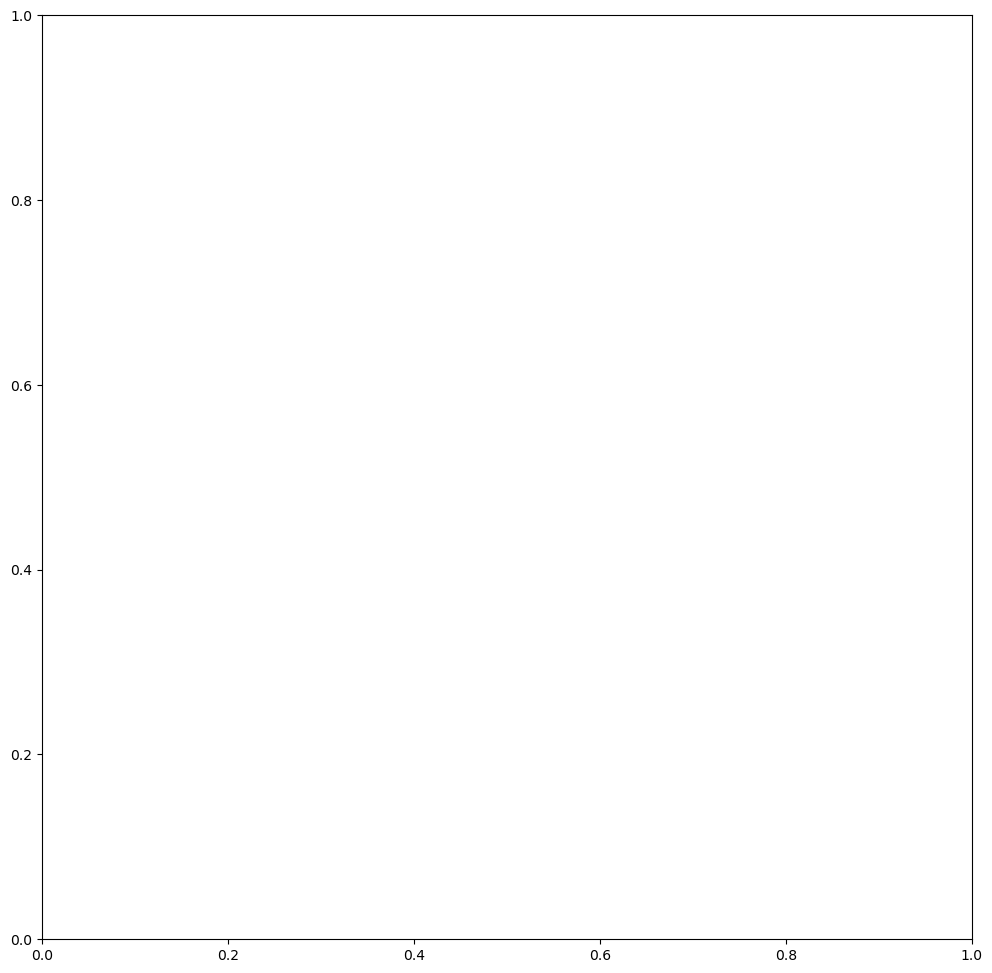

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

country_order2 = ['USA', 'India', 'UK', 'Canada', 
 'Italy', 'Spain', 'Germany', 
 'France', 'Australia']

age_order = ['Kids', 'Older Kids', 'Teens', 'Young Adults', 'Adults']

sns.heatmap(df_heatmap.loc[age_order,country_order2],square=True, linewidth=2.5,cbar=False,
            annot=True,fmt='1.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":12}, cmap = 'Blues')

ax.spines['top'].set_visible(True)

fig.text(.99, .725, 'Target ages proportion of total content by country', 
         fontweight='bold', fontfamily='serif', fontsize=15,ha='right')   

ax.set_yticklabels(ax.get_yticklabels(), fontfamily='serif', rotation = 0, fontsize=11)
ax.set_xticklabels(ax.get_xticklabels(), fontfamily='serif', rotation=90, fontsize=11)

ax.set_ylabel('')    
ax.set_xlabel('')
ax.tick_params(axis=u'both', which=u'both',length=0)
plt.tight_layout()
plt.show()

# Movies & Tv Shows added over time 

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
color = ['#00A8E1', '#BFF5FD']

for i, mtv in enumerate(df['type'].value_counts().index):
    mtv_rel = df[df['type']==mtv]['release_year'].value_counts().sort_index()
    ax.plot(mtv_rel.index, mtv_rel, color=color[i], label=mtv)
    ax.fill_between(mtv_rel.index, 0, mtv_rel, color=color[i], alpha=0.9)

ax.yaxis.tick_right()
ax.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

# Setting x axis limit 
ax.set_xlim(2008,2020)
plt.xticks(np.arange(2000, 2021, 1))

for s in ['top', 'right','bottom','left']:
    ax.spines[s].set_visible(False)
    
fig.text(0.13, 0.85, 'Movies & TV Shows added over time', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.13,0.28,"Movie", fontweight="bold", fontfamily='serif', fontsize=15, color='#00A8E1')
fig.text(0.19,0.28,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.2,0.28,"TV Show", fontweight="bold", fontfamily='serif', fontsize=15, color='#BFF5FD')

ax.tick_params(axis=u'both', which=u'both',length=0)
